# Assignment - Document Classification

### Austin Chan, Justin Herman, Chester Poon, Deepak Mongia, Michael O'Donnell

As a part of this assignment, we are working on a given data set which is a set of emails with the frequencies given for various words and strings for 4601 emails, and a class which suggests whether a particular email is a spam or ham (non-spam).
Data source is: http://archive.ics.uci.edu/ml/datasets/Spambase

As a part of this assignment, we will use this data set, and divide it into training and test data set. We will build a classifier, fit it using the training data, and evaluate it using the test data.

Importing the required packages:

In [1]:
import nltk
from nltk import *
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt

In [2]:
# Getting the field names from the file "spambase.names"

names_list = []

with open("spambase.names") as f:
    for line in f:
        if not line.startswith(("|","1","\n")):
            names_list.append(line.split(":")[0])

In [3]:
# Adding spamclass to the field names, so it can be used to name the columns for the dataframe

names_list.append("spamclass")

In [4]:
# Reading the file "spambase.data" to get the data

data_df = pd.read_csv("spambase.data", header=None)

In [5]:
# Renaming the dataframe columns to relevant names from the other file

data_df.columns = names_list

In [6]:
print(data_df.head)

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
5               0.00               0.00           0.00           0.0   
6               0.00               0.00           0.00           0.0   
7               0.00               0.00           0.00           0.0   
8               0.15               0.00           0.46           0.0   
9               0.06               0.12           0.77           0.0   
10              0.00               0.00           0.00           0.0   
11              0.00               0.00           0.25           0.0   
12              0.00              

In [7]:
data_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
# Counting the spam and ham

count_spam = len(data_df[data_df.spamclass == 1])
count_ham = len(data_df[data_df.spamclass == 0])

print("number of spam emails in the dataset: ", count_spam)
print("number of non-spam emails in the dataset: ", count_ham)

number of spam emails in the dataset:  1813
number of non-spam emails in the dataset:  2788


In [9]:
# Importing the library to split the dataset into training and test sets

from sklearn.model_selection import train_test_split

In [10]:
# Creating X (independent variables) and y (dependent variable)

X = data_df.loc[:, data_df.columns != "spamclass"]
y = data_df.loc[:, data_df.columns == "spamclass"]

In [11]:
# Splitting the dataset into training and test sets using stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [12]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (3680, 57)
y_train shape:  (3680, 1)


In [13]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_test shape:  (921, 57)
y_test shape:  (921, 1)


In [14]:
# Importing the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [15]:
# Creating the Random Forest Classifier and training it using the training set

random_forest_cf = RandomForestClassifier()

random_forest_cf = random_forest_cf.fit(X_train, y_train.spamclass)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
# Using the trained Random Forest classifier to test it using the test data

random_forest_cf_predict = random_forest_cf.predict(X_test)

In [17]:
print(random_forest_cf_predict)

[0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 

In [18]:
# Evaluating the model - comparing the predicted values from the classifier and actual test class values

print(np.mean(random_forest_cf_predict == y_test.spamclass))

0.9522258414766558


The model predicts the test results with 94.24 % which is quite good.

In [19]:
# Calculating the feature importances of all the 57 independent variables

print(random_forest_cf.feature_importances_)

[4.79353530e-03 3.80382221e-03 8.96560746e-03 9.04750191e-04
 3.28520278e-02 7.58394524e-03 1.02245070e-01 4.29589822e-03
 1.41056481e-02 6.32916064e-03 4.39623514e-03 9.26708077e-03
 5.43653941e-03 1.06869789e-03 9.28182169e-04 7.33480146e-02
 1.41650290e-02 5.13019816e-03 3.37996861e-02 1.37754624e-02
 3.80511247e-02 2.37830068e-03 8.33599921e-03 3.74981661e-02
 2.46836687e-02 3.90949978e-02 2.18618660e-02 6.26046874e-03
 1.59580164e-03 2.01103002e-03 6.35119870e-04 3.17570925e-03
 1.73253893e-03 1.75605032e-05 3.66463758e-03 3.28620961e-03
 9.68260275e-03 5.36481251e-04 2.66663872e-03 4.56745445e-04
 7.20310514e-04 4.27671474e-03 1.22008580e-03 1.93909886e-03
 7.88340886e-03 2.10711284e-02 9.39702193e-05 1.21025387e-03
 4.62167535e-03 1.06952066e-02 1.16438859e-03 1.22331982e-01
 1.41672817e-01 8.15927674e-03 5.06415531e-02 3.69467095e-02
 3.05311608e-02]


In [20]:
# Creating the sorted importance set to see which are the most important features

importances = random_forest_cf.feature_importances_

std = np.std([tree.feature_importances_ for tree in random_forest_cf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

In [21]:
# Printing the features with their importances in determining the output class - from highest to lowest

for f in range(X.shape[1]):
    print("%d. (feature %d)" %(f + 1, indices[f]), X.columns[indices[f]], "(%f)" %(importances[indices[f]]))

1. (feature 52) char_freq_$ (0.141673)
2. (feature 51) char_freq_! (0.122332)
3. (feature 6) word_freq_remove (0.102245)
4. (feature 15) word_freq_free (0.073348)
5. (feature 54) capital_run_length_average (0.050642)
6. (feature 25) word_freq_hpl (0.039095)
7. (feature 20) word_freq_your (0.038051)
8. (feature 23) word_freq_money (0.037498)
9. (feature 55) capital_run_length_longest (0.036947)
10. (feature 18) word_freq_you (0.033800)
11. (feature 4) word_freq_our (0.032852)
12. (feature 56) capital_run_length_total (0.030531)
13. (feature 24) word_freq_hp (0.024684)
14. (feature 26) word_freq_george (0.021862)
15. (feature 45) word_freq_edu (0.021071)
16. (feature 16) word_freq_business (0.014165)
17. (feature 8) word_freq_order (0.014106)
18. (feature 19) word_freq_credit (0.013775)
19. (feature 49) char_freq_( (0.010695)
20. (feature 36) word_freq_1999 (0.009683)
21. (feature 11) word_freq_will (0.009267)
22. (feature 2) word_freq_all (0.008966)
23. (feature 22) word_freq_000 (0.008

As we see above, these 5 variables are the most important in determining the class:

char_freq_!
<br>
char_freq_$
<br>
capital_run_length_average
<br>
word_freq_your
<br>
word_freq_remove

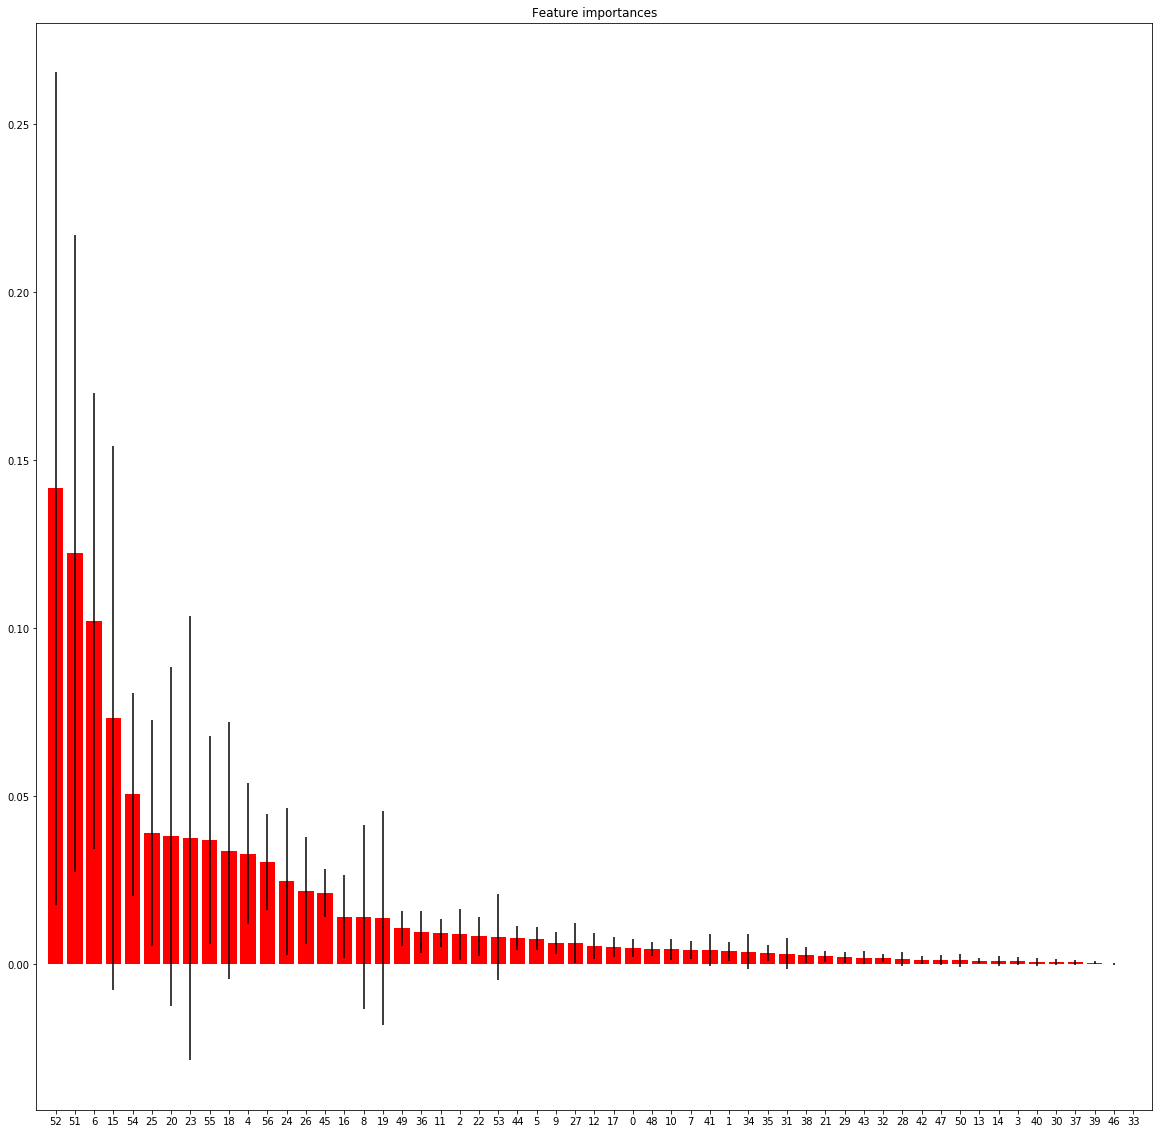

In [22]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()